<a href="https://colab.research.google.com/github/jeffleon/Python_Google_Colab/blob/master/Data_Wrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Learning Objectives**
-  Identify and handle missing values
-  Data Formatting
-  Data Normalization (centering/scaling)
-  Data Binning 

##**Missing Values**

In [0]:
import pandas as pd
import numpy as np

In [0]:
df = pd.DataFrame({"number":[2,34,5,67,np.nan],"blank":[np.nan,np.nan,np.nan,np.nan,np.nan]},index=["uno","dos","tres","cuatro","cinco"])
df

,number,blank
uno,2.0,NaN
dos,34.0,NaN
tres,5.0,NaN
cuatro,67.0,NaN
cinco,NaN,NaN


***if you one to drop use the comand***


```
dataframe.dropna()
```
- ***axis = 0*** *for a entire row*
- ***axis = 1*** *for a entire colum* 

***if you want change the dataframe use the comand***


```
 inplace = True
```




In [0]:
df.dropna(subset=["number"], axis=0, inplace=True)
df

,number,blank
uno,2.0,NaN
dos,34.0,NaN
tres,5.0,NaN
cuatro,67.0,NaN


In [0]:
df.dropna(subset=["uno"],axis = 1, inplace=True)
df

,number
uno,2.0
dos,34.0
tres,5.0
cuatro,67.0


In [0]:
df = pd.DataFrame({"number":[2,34,5,67,np.nan],"blank":[80,np.nan,70,90,np.nan]},index=["uno","dos","tres","cuatro","cinco"])
df

,number,blank
uno,2.0,80.0
dos,34.0,NaN
tres,5.0,70.0
cuatro,67.0,90.0
cinco,NaN,NaN


In [0]:
mean = df["number"].mean()
mean

27.0

In [0]:
df["number"].replace(np.nan,mean,inplace=True)
df

,number,blank
uno,2.0,80.0
dos,34.0,NaN
tres,5.0,70.0
cuatro,67.0,90.0
cinco,27.0,NaN


In [0]:
mean1 = df["blank"].mean()
mean1

80.0

In [0]:
df["blank"].replace(np.nan,mean1, inplace=True)
df

,number,blank
uno,2.0,80.0
dos,34.0,80.0
tres,5.0,70.0
cuatro,67.0,90.0
cinco,27.0,80.0


##**Formatting**

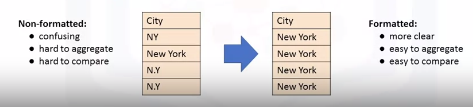

In [0]:
df = pd.DataFrame({"city-mpg":[21,21,19]})
df

,city-mpg
0,21
1,21
2,19


In [0]:
df["city-mpg"] = 235/df["city-mpg"]

df.rename(columns={"city-mpg":"city-L/100Km"},inplace=True)

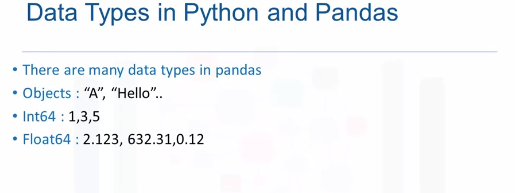

In [0]:
df.dtypes

city-mpg    float64
dtype: object

In [0]:
df["city-L/100Km"] = df["city-L/100Km"].astype("int")
df.dtypes

city-L/100Km    int64
dtype: object

##**Normalization**


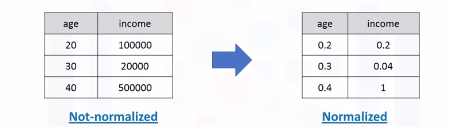

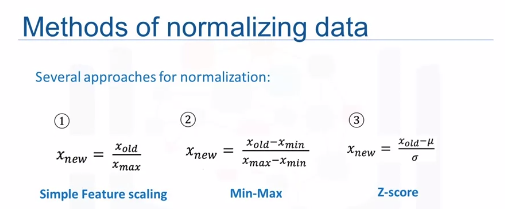

In [0]:
df = pd.DataFrame({"length":[168.8,155,180.0],"width":[64.1,55,65.5],"height":[48.8,30,52.4]})
df

,length,width,height
0,168.8,64.1,48.8
1,155.0,55.0,30.0
2,180.0,65.5,52.4


In [0]:
df["length"] = df["length"]/df["length"].max()
df

,length,width,height
0,0.937778,64.1,48.8
1,0.861111,55.0,30.0
2,1.000000,65.5,52.4


In [0]:
df["width"] = (df["width"]-df["width"].min())/(df["width"].max()-df["width"].min())
df

,length,width,height
0,0.937778,0.866667,48.8
1,0.861111,0.000000,30.0
2,1.000000,1.000000,52.4


In [0]:
df["height"] = (df["height"]-df["height"].mean())/df["height"].std()
df

,length,width,height
0,0.937778,0.866667,0.421209
1,0.861111,0.000000,-1.141699
2,1.000000,1.000000,0.720490


##**Binning**

In [0]:
df = pd.DataFrame({"price":[13495,16500,18920,41315,5151,6295]})
df

,price
0,13495
1,16500
2,18920
3,41315
4,5151
5,6295


In [0]:
bins = np.linspace(df["price"].min(),df["price"].max(),4)
bins

array([ 5151.        , 17205.66666667, 29260.33333333, 41315.        ])

In [0]:
group_names = ["Low","Medium","High"]

In [0]:
df["price_binned"] = pd.cut(df["price"],bins)
df

,price,price_binned
0,13495,"(5151.0, 17205.667]"
1,16500,"(5151.0, 17205.667]"
2,18920,"(17205.667, 29260.333]"
3,41315,"(29260.333, 41315.0]"
4,5151,NaN
5,6295,"(5151.0, 17205.667]"


In [0]:
df["price_binned"] = pd.cut(df["price"],bins,labels = group_names,include_lowest=True)
df

,price,price_binned
0,13495,Low
1,16500,Low
2,18920,Medium
3,41315,High
4,5151,Low
5,6295,Low


In [0]:
import matplotlib.pyplot as plt

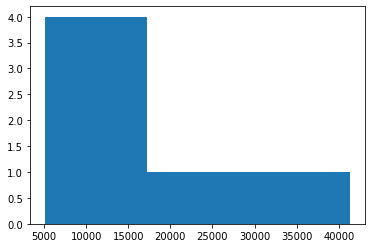

In [0]:
plt.hist(df["price"],3)
plt.show()

#**Turning categorical Variables into quantitaive variables in Python**

In [0]:
df = pd.DataFrame({"Car":["A","B","C","D"],"Fuel":["gas","Fuel","gas","Fuel"]})
df.set_index("Car")

,Fuel
Car,
A,gas
B,Fuel
C,gas
D,Fuel


In [0]:
df = pd.get_dummies(df["Fuel"])
df

,Fuel,gas
0,0,1
1,1,0
2,0,1
3,1,0
